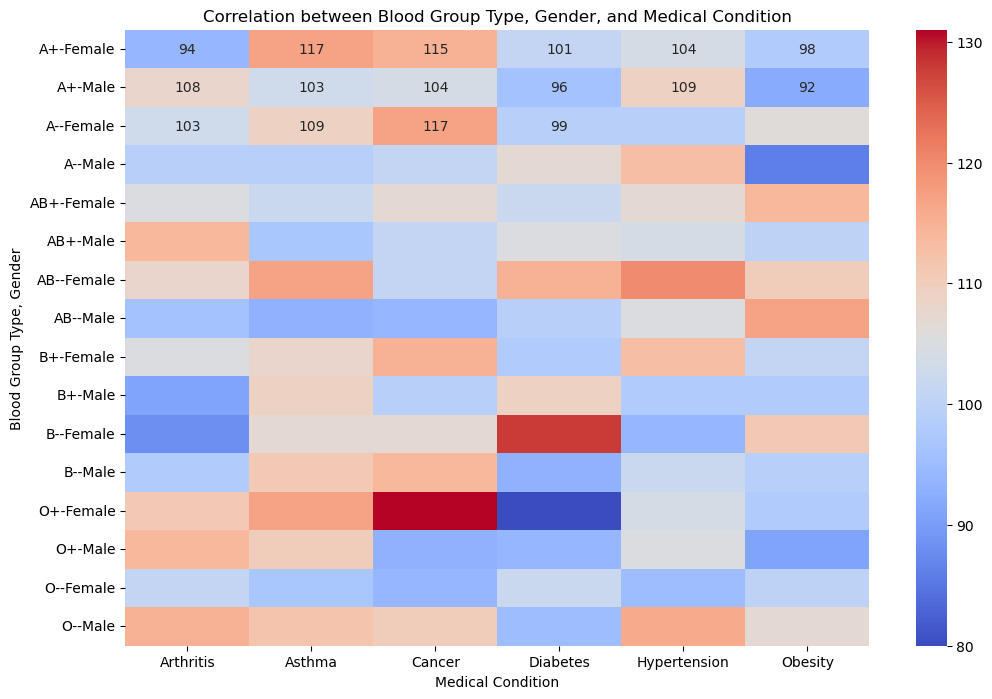

Average Billing Amount for each Medical Condition:
Medical Condition
Arthritis       25187.631255
Asthma          25416.869895
Cancer          25539.096133
Diabetes        26060.116129
Hypertension    25198.033973
Obesity         25720.842683
Name: Billing Amount, dtype: float64


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the data from healthcare_dataset.csv file
data = pd.read_csv(r'C:\Users\Varad\Assignment\healthcare_dataset.csv')

# Create a pivot table to prepare the data for heatmap
pivot_table = data.pivot_table(index=['Blood Group Type', 'Gender'], columns='Medical Condition', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='g')
plt.title('Correlation between Blood Group Type, Gender, and Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Blood Group Type, Gender')
plt.show()

# Calculate the average billing amount for each medical condition
average_billing = data.groupby('Medical Condition')['Billing Amount'].mean()
print("Average Billing Amount for each Medical Condition:")
print(average_billing)


In [11]:
import pandas as pd
import streamlit as st

# Reading the data from healthcare_dataset.csv file
data = pd.read_csv(r'C:\Users\Varad\Assignment\healthcare_dataset.csv')

#Contigency table for analyzing co-relation between 3 columns 
contingency_table = pd.crosstab(index=[data['Blood Group Type'], data['Gender']], columns=data['Medical Condition'])
#print(contingency_table)

# Function to determine the medical condition based on user input
def determine_medical_condition(name, gender, blood_group):
    # Find the column with the highest count for the user's Gender within their Blood Group Type
    column_name = (blood_group, gender)
    most_common_condition_column = contingency_table[column_name].idxmax()

    # Determine the medical condition associated with this column
    most_common_condition = most_common_condition_column

    # Return the medical condition with the highest count
    return most_common_condition

# Main function for the Streamlit web app
def main():
    # Set title
    st.title("Healthcare Risk Assessment")

    # User input fields
    name = st.text_input("Enter your name:")
    gender = st.selectbox("Select your gender:", ['Male', 'Female'])
    blood_group = st.selectbox("Select your blood group:", ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-'])

    # Button to trigger risk assessment
    if st.button("Assess Risk"):
        medical_condition = determine_medical_condition(name, gender, blood_group)
        st.write(f"Hello {name}, based on your gender and blood group, you are at risk for: {medical_condition}")

 # Store user data in a DataFrame
        user_data = pd.DataFrame({'Name': [name], 'Gender': [gender], 'Blood Group': [blood_group]})

        # Append user data to a CSV file
        with open('user_data.csv', 'a') as f:
            user_data.to_csv(f, header=f.tell()==0, index=False)

# Run the Streamlit app
if __name__ == '__main__':
    main()


Medical Condition        Arthritis  Asthma  Cancer  Diabetes  Hypertension  \
Blood Group Type Gender                                                      
A+               Female         94     117     115       101           104   
                 Male          108     103     104        96           109   
A-               Female        103     109     117        99            99   
                 Male           99      99     101       107           113   
AB+              Female        105     102     107       102           107   
                 Male          114      97     101       105           104   
AB-              Female        108     117     101       115           120   
                 Male           96      93      94        99           105   
B+               Female        105     108     115        98           113   
                 Male           91     109      99       109            98   
B-               Female         88     107     107       128    